In [1]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction
import numpy as np
import pandas as pd
import json
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

D:\Softwares\Anaconda\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [2]:
df = pd.read_excel(r"C:\Users\surya\Desktop\Jupyter Python Programs\Amazon Review NLP\LIWC_Cell_Phone_Reviews.xlsx")
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,...,Affect,tone_pos,tone_neg,emotion,emo_pos,emo_neg,time,focuspast,focuspresent,focusfuture
0,1,False,"09 21, 2004",A5JLAU2ARJ0BO,B0000E3GWH,NaN,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,...,10.94,4.69,4.69,3.13,0.00,1.56,0.00,0.00,10.94,0.00
1,4,False,"07 24, 2004",A1ACM1CBGORBN1,B0000E3GWH,NaN,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,...,4.39,3.41,0.98,0.98,0.49,0.49,4.39,2.20,9.02,2.20
2,3,False,"07 6, 2004",A2V48Q03FZUOSD,B0000E3GWH,NaN,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,...,5.02,2.34,2.68,2.68,1.00,1.67,2.01,3.01,8.70,0.00
3,5,True,"04 12, 2004",A1V3TRGWOMA8LC,B0000E3GWH,NaN,James Beswick,"..and I'm from Europe, where the phones and ne...",The best phone I've ever owned,1081728000,...,7.27,7.27,0.00,0.00,0.00,0.00,1.82,1.82,7.27,3.64
4,3,False,"02 19, 2004",A3NOBH42C7UI5M,B0000E3GWH,NaN,Kepela,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,1077148800,...,3.04,2.23,0.81,1.62,0.81,0.81,5.26,3.85,6.07,0.81


In [3]:
# Load the regular expression library
import re

# Remove punctuation
df['review_text_processed'] = df['reviewText'].map(lambda x: re.sub('[,\.!?]', '', str(x)))  # str(x) because some ele were float, so converted them to string

# Convert the titles to lowercase
df['review_text_processed'] = df['review_text_processed'].map(lambda x: x.lower())

# Print out the first rows of reviews
df['review_text_processed'].head()

0    this phone is ugly and heavy and has a terribl...
1    i had the samsung v205 and then i decided to t...
2    this is the first samsung phone i have had and...
3    and i'm from europe where the phones and netwo...
4    this phone is amazingly small and light for a ...
Name: review_text_processed, dtype: object

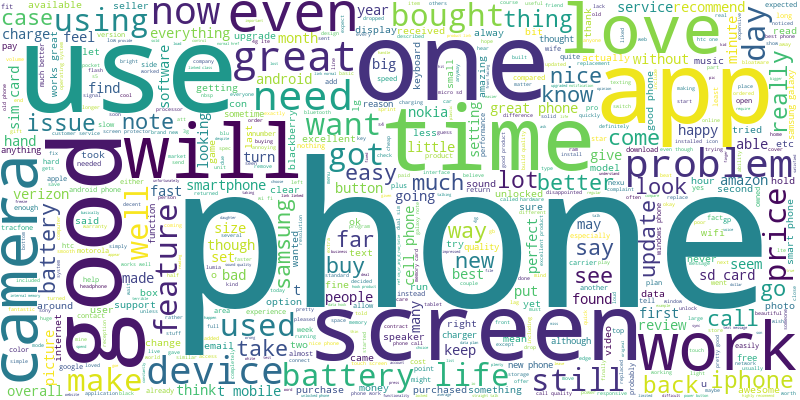

In [4]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['review_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Lemmatization()

In [5]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):  # texts is the list with 252 elements
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = [] 
    for text in texts:  # for every element (lets think of this element as a review) in texts
        doc = nlp(text) # doc is sorta like tokenizing, but we do get punctuation marks also so more like split()
        new_text = []  # this will be a list of lemmatized words in any review
        for token in doc: # doc is a list of tokenized words
            if token.pos_ in allowed_postags: # can also add if not token.is_punct to remove punctuations
                new_text.append(token.lemma_) 
        final = " ".join(new_text) # this is a string, all lemmatized words joined by spaces
        texts_out.append(final) # string of all the 252 reviews will be added here
    return (texts_out)

In [6]:
data = df.review_text_processed.values.tolist() # strings of all reviews in one list

In [7]:
data

['this phone is ugly and heavy and has a terrible user interface even for techies like myself  it also drops calls like crazy here in manhattan  the moto v600 is a much better phone takes better pictures gives you better clarity and reception is smaller and is much much cheaper  get the moto v600 if you want t-mobile  stay away from this ugly monster',
 "i had the samsung v205 and then i decided to try the e715 out fyi to people with battery problems with these kind of batteries you must let it drain completely and then charge it kind of like building up your battery life and doing this a few times it will improve your battery life immensely i've been a t-mobile customer for a while now and i stay with them because: 1) they are now no 1 in customer service 2) great rate plans 3) it works great where i need it the most\n\nnow the additional features that the v205 didn't have that this little gadget has is:\n\n1) caller id pics although you won't be able to see it on the external display

In [8]:
lemmatized_texts = lemmatization(data)

In [9]:
data[1]

"i had the samsung v205 and then i decided to try the e715 out fyi to people with battery problems with these kind of batteries you must let it drain completely and then charge it kind of like building up your battery life and doing this a few times it will improve your battery life immensely i've been a t-mobile customer for a while now and i stay with them because: 1) they are now no 1 in customer service 2) great rate plans 3) it works great where i need it the most\n\nnow the additional features that the v205 didn't have that this little gadget has is:\n\n1) caller id pics although you won't be able to see it on the external display when you flip it open you'll see that person's face\n\n2) the camera now has a flash as well as a zoom and with that it is able to take pictures in gray (black and white) negative sepia and sketch also you can do multi-shot with this as well as put lots of different kind of frames to your pictures\n\n3)you can download games with the e715 whereas you ca

## Removing stopwords, punctuation marks

In [10]:
#import gensim
#from gensim.utils import simple_preprocess
#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords

stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences): # this uses simple_preprocess, which uses tokenize() internally, hence sent to words
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) # deacc=True removes punctuations and accents, like café will be converted to cafe

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [11]:
#data = df.review_text_processed.values.tolist() # strings of all reviews in one list
data_words = list(sent_to_words(lemmatized_texts))

# remove stop words
data_words = remove_stopwords(data_words)

### How all this is working

In [12]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
data_trial = ['hi! my name is suryam.', 'and this is my friend, yash, who likes to sit in a café.']

In [14]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuation marks and accents, like café will be converted to cafe
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [15]:
data_words_trial = list(sent_to_words(data_trial))
data_words_trial

[['hi', 'my', 'name', 'is', 'suryam'],
 ['and',
  'this',
  'is',
  'my',
  'friend',
  'yash',
  'who',
  'likes',
  'to',
  'sit',
  'in',
  'cafe']]

In [16]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [17]:
data_words_trial = remove_stopwords(data_words_trial)
data_words_trial

[['hi', 'name', 'suryam'], ['friend', 'yash', 'likes', 'sit', 'cafe']]

### Main dataset work resume

In [18]:
len(data_words)

53630

In [19]:
print(data_words[0])

['phone', 'ugly', 'heavy', 'terrible', 'user', 'interface', 'even', 'techie', 'also', 'drop', 'call', 'crazy', 'moto', 'much', 'well', 'phone', 'take', 'well', 'picture', 'give', 'well', 'clarity', 'reception', 'small', 'much', 'much', 'cheap', 'get', 'moto', 'want', 'mobile', 'stay', 'away', 'ugly', 'monster']


## Unique Words and their frequency (Bag of Words)

In [20]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

#### Viewing unique words and their frequency of the first review

In [21]:
id_words = [[(id2word[id], count) for id, count in line] for line in corpus]
print(id_words[0])

[('also', 1), ('away', 1), ('call', 1), ('cheap', 1), ('clarity', 1), ('crazy', 1), ('drop', 1), ('even', 1), ('get', 1), ('give', 1), ('heavy', 1), ('interface', 1), ('mobile', 1), ('monster', 1), ('moto', 2), ('much', 3), ('phone', 2), ('picture', 1), ('reception', 1), ('small', 1), ('stay', 1), ('take', 1), ('techie', 1), ('terrible', 1), ('ugly', 2), ('user', 1), ('want', 1), ('well', 3)]


In [22]:
print(data_words[0])

['phone', 'ugly', 'heavy', 'terrible', 'user', 'interface', 'even', 'techie', 'also', 'drop', 'call', 'crazy', 'moto', 'much', 'well', 'phone', 'take', 'well', 'picture', 'give', 'well', 'clarity', 'reception', 'small', 'much', 'much', 'cheap', 'get', 'moto', 'want', 'mobile', 'stay', 'away', 'ugly', 'monster']


## LDA Model

In [35]:
# Ref - https://radimrehurek.com/gensim/models/ldamodel.html
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [36]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())

[(0,
  '0.028*"phone" + 0.023*"get" + 0.021*"go" + 0.019*"issue" + 0.018*"call" + '
  '0.017*"problem" + 0.016*"time" + 0.016*"sim" + 0.015*"update" + '
  '0.015*"charge"'),
 (1,
  '0.179*"phone" + 0.046*"good" + 0.039*"great" + 0.033*"work" + 0.027*"use" + '
  '0.025*"buy" + 0.023*"get" + 0.023*"price" + 0.017*"love" + 0.017*"well"'),
 (2,
  '0.039*"screen" + 0.027*"camera" + 0.017*"battery" + 0.013*"make" + '
  '0.012*"well" + 0.011*"also" + 0.011*"take" + 0.011*"use" + 0.010*"case" + '
  '0.009*"big"'),
 (3,
  '0.098*"excellent" + 0.088*"product" + 0.042*"unlocked" + 0.038*"mobile" + '
  '0.035*"seller" + 0.034*"carrier" + 0.031*"unlock" + 0.024*"condition" + '
  '0.023*"link" + 0.022*"network"'),
 (4,
  '0.096*"app" + 0.040*"card" + 0.039*"gb" + 0.031*"run" + 0.028*"storage" + '
  '0.027*"memory" + 0.025*"play" + 0.022*"sd" + 0.020*"game" + 0.017*"ram"'),
 (5,
  '0.037*"video" + 0.031*"use" + 0.020*"wifi" + 0.014*"image" + '
  '0.012*"bluetooth" + 0.012*"datum" + 0.012*"photo" + 0.

In [37]:
pyLDAvis.enable_notebook(local=True)
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.102080 -0.001479       1        1  27.652000
2     -0.121652 -0.366722       2        1  27.594781
0     -0.370888 -0.146157       3        1  19.596293
5     -0.281643  0.326344       4        1   8.293335
6      0.304077 -0.307985       5        1   7.254067
4      0.407052  0.074830       6        1   6.673243
3      0.165133  0.421170       7        1   2.936280, topic_info=           Term           Freq          Total Category  logprob  loglift
16        phone  107955.000000  107955.000000  Default  30.0000  30.0000
667         app   12556.000000   12556.000000  Default  29.0000  29.0000
75         good   24830.000000   24830.000000  Default  28.0000  28.0000
77        great   21192.000000   21192.000000  Default  27.0000  27.0000
359      screen   21079.000000   21079.000000  Default  26.0000  26.0000
...         ...            ...            ...      ...      ...      ...
197     network    1279.820178    2291.602062   Topic7  -3.8042   2.9455
1307     normal     529.452156    1442.858506   Topic7  -4.6868   2.5255
1025    version     675.805668    3729.612145   Topic7  -4.4428   1.8199
837        data     420.070299     874.329830   Topic7  -4.9182   2.7950
199   recommend     473.527876    3531.018551   Topic7  -4.7985   1.5189

[371 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
654        4  0.999544    access
205        3  0.998983  activate
3679       3  0.999808        ad
291        2  0.516653       add
291        3  0.072544       add
...      ...       ...       ...
287        1  0.946226      year
287        5  0.053626      year
4915       6  0.998951   youtube
17064      6  0.998312   zenfone
136        4  0.997513      zoom

[489 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 6, 7, 5, 4])

In [26]:
# # Ref - https://neptune.ai/blog/pyldavis-topic-modelling-exploration-tool-that-every-nlp-data-scientist-should-know
# coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\\nCoherence Score: ', coherence_lda)  # the higher the better

"# Ref - https://neptune.ai/blog/pyldavis-topic-modelling-exploration-tool-that-every-nlp-data-scientist-should-know\ncoherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')\ncoherence_lda = coherence_model_lda.get_coherence()\nprint('\\nCoherence Score: ', coherence_lda)  # the higher the better"

### Running LDA model with different number of topics and checking their coherence

In [52]:
# # Function for training multiple models - Ref - https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#17howtofindtheoptimalnumberoftopicsforlda
# def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
#     """
#     Compute c_v coherence for various number of topics

#     Parameters:
#     ----------
#     dictionary : Gensim dictionary
#     corpus : Gensim corpus
#     texts : List of input texts
#     limit : Max num of topics

#     Returns:
#     -------
#     model_list : List of LDA topic models
#     coherence_values : Coherence values corresponding to the LDA model with respective number of topics
#     """
#     coherence_values = []
#     model_list = []
#     for num_topics in range(start, limit, step):
#         #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
#         model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=5,
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha="auto")
#         model_list.append(model)
#         coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
#         coherence_values.append(coherencemodel.get_coherence())

#     return model_list, coherence_values

In [53]:
# # Can take a long time to run.
# model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=2, limit=20, step=6)

In [54]:
# # Show graph
# limit=20; start=2; step=6;
# x = range(start, limit, step)
# plt.plot(x, coherence_values)
# plt.xlabel("Num Topics")
# plt.ylabel("Coherence score")
# plt.legend(("coherence_values"), loc='best')
# plt.show()

In [55]:
# # Print the coherence scores
# for m, cv in zip(x, coherence_values):
#     print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

# How many topics to each document

Ref - https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

In [47]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [48]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.4605,"phone, get, great, work, use, buy, well, go, l...","[phone, ugly, heavy, terrible, user, interface..."
1,1,4.0,0.3291,"screen, camera, well, gb, video, quality, spea...","[decide, try, fyi, people, battery, problem, k..."
2,2,1.0,0.4388,"phone, get, great, work, use, buy, well, go, l...","[first, phone, quite, measure, tmobile, custom..."
3,3,1.0,0.4021,"phone, get, great, work, use, buy, well, go, l...","[phone, network, much, well, state, say, think..."
4,4,1.0,0.3337,"phone, get, great, work, use, buy, well, go, l...","[phone, amazingly, small, light, camera, phone..."
5,5,1.0,0.4427,"phone, get, great, work, use, buy, well, go, l...","[last, year, see, explosion, nice, color, phon..."
6,6,1.0,0.2932,"phone, get, great, work, use, buy, well, go, l...","[receive, treo, last, treocentral, service, sp..."
7,7,1.0,0.4535,"phone, get, great, work, use, buy, well, go, l...","[year, title, review, pretty, much, sum, feel,..."
8,8,5.0,0.4146,"app, use, find, also, wifi, set, add, network,...","[blackberry, user, last, year, use, email, day..."
9,9,1.0,0.2888,"phone, get, great, work, use, buy, well, go, l...","[replace, office, treo, case, time, twice, spe..."


In [50]:
df_dominant_topic['Dominant_Topic'].value_counts()

1.0    52633
4.0      609
5.0      345
2.0       26
6.0        8
7.0        4
0.0        2
3.0        2
9.0        1
Name: Dominant_Topic, dtype: int64